In [1]:
#importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
X_train = []
y_train = []
for i in range (60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

#reshapping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [5]:
#importing the keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [6]:
# !pip install keras

In [7]:
# !pip install tensorflow

In [8]:
#initialising the RNN
regressor = Sequential()

In [9]:
#adding the first LSTM layer and same dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [10]:
#adding a second LSTM layer and same dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [11]:
#adding a third LSTM layer and same dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [12]:
#adding a fourth LSTM layer and same dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [13]:
#Adding the output layer
regressor.add(Dense(units = 1))

In [14]:
#Compailing the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [15]:
#fitting the RNN to the training set]
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 16s 118ms/step - loss: 0.0507
Epoch 2/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0063
Epoch 3/100
38/38 [==============================] - 7s 171ms/step - loss: 0.0057
Epoch 4/100
38/38 [==============================] - 6s 151ms/step - loss: 0.0061
Epoch 5/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0056
Epoch 6/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0056
Epoch 7/100
38/38 [==============================] - 7s 177ms/step - loss: 0.0044
Epoch 8/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0045
Epoch 9/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0039
Epoch 10/100
38/38 [==============================] - 6s 151ms/step - loss: 0.0045
Epoch 11/100
38/38 [==============================] - 6s 162ms/step - loss: 0.0040
Epoch 12/100
38/38 [==============================] - 6s 163ms/step - loss: 0.0040
Epoch 13/100

38/38 [==============================] - 6s 160ms/step - loss: 0.0017
Epoch 100/100
38/38 [==============================] - 6s 166ms/step - loss: 0.0013


In [16]:
#load the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Train.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [17]:
#Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

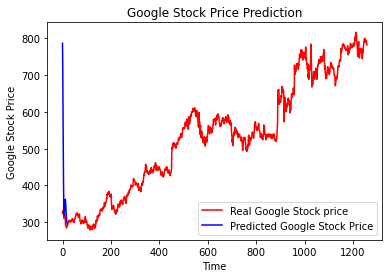

In [18]:
#visualising the results
plt.plot(real_stock_price, color = 'red', label = "Real Google Stock price")
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()